<a href="https://colab.research.google.com/github/joepaul13/FFNeuralNetwork/blob/main/FFNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [5]:
train_dataset = torchvision.datasets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor())

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

torch.Size([100, 1, 28, 28]) torch.Size([100])


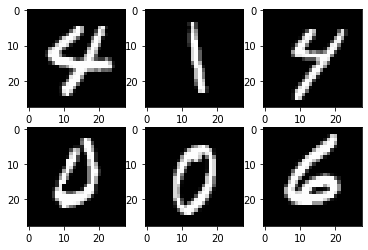

In [9]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap = 'gray')
plt.show()

In [10]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [11]:
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [12]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1 / 2, step 100/600, loss = 0.4131
epoch 1 / 2, step 200/600, loss = 0.3156
epoch 1 / 2, step 300/600, loss = 0.1539
epoch 1 / 2, step 400/600, loss = 0.3637
epoch 1 / 2, step 500/600, loss = 0.3050
epoch 1 / 2, step 600/600, loss = 0.3288
epoch 2 / 2, step 100/600, loss = 0.2175
epoch 2 / 2, step 200/600, loss = 0.1580
epoch 2 / 2, step 300/600, loss = 0.1190
epoch 2 / 2, step 400/600, loss = 0.1228
epoch 2 / 2, step 500/600, loss = 0.1748
epoch 2 / 2, step 600/600, loss = 0.1547


In [13]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct = (predictions == labels).sum().item()
  
  acc = 100.0 * n_correct/n_samples
  print(f'accuracy = {acc}')

accuracy = 0.99
